<a href="https://colab.research.google.com/github/NetoRibeiro/ML_ImageClassification_Supervised_Learning/blob/main/COMP8043_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.cluster import KMeans, DBSCAN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, mean_squared_error

from math import sqrt

from skimage.io import imread, imshow

from pylab import *

In [2]:
train_folder = '/content/drive/MyDrive/COMP8043_Machine_Learning/Assignment3/data/train/'
test_folder = '/content/drive/MyDrive/COMP8043_Machine_Learning/Assignment3/data/test/'

In [3]:
# Funtion that read the Images into a List
def read_and_transform_images(folders):
  pca = PCA(n_components=100)
  folder_images = os.listdir(folders)
  images_original = []
  images_label = []
  images_label_code = []
  images_pca_components = []
  images_pca_singular_values = []
  for image in folder_images:
    img = cv2.imread(f'{folders}{image}', cv2.IMREAD_COLOR)
    
    # Take the Labels from the train dataset
    if folders == '/content/drive/MyDrive/COMP8043_Machine_Learning/Assignment3/data/train/':
      label, _1, _2 = image.split(".")
      if label == "dog":
        label_code = 1
      else:
        label_code = 0
    else:
      label = ""
      label_code = ""

    images_original.append(img)
    images_label.append(label)
    images_label_code.append(label_code)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (350,350))
    img_pca = pca.fit(img)
    images_pca_components.append(img_pca.components_)
    images_pca_singular_values.append(img_pca.singular_values_)
    
  return images_original, images_pca_components, images_pca_singular_values, images_label, images_label_code

In [4]:
# Function to print an Image
def print_image(image, label):
  plt.figure(figsize=[10, 5]),
  plt.subplot(121),
  plt.axis('off'),
  plt.imshow(image),
  plt.title(f'Print Image {label.upper()}')
  plt.show()

In [5]:
# Read the Train Images
images_orignal, train_pca_components, train_pca_singular_values, train_labels, train_labels_code = read_and_transform_images(train_folder)

In [6]:
len(images_orignal), len(train_pca_components), len(train_pca_singular_values), len(train_labels)

(1002, 1002, 1002, 1002)

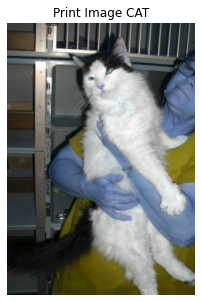

In [7]:
# Call function to print selected image
print_image(images_orignal[0], train_labels[0])

In [8]:
# Read the Test Images
images_orignal_test, test_pca_components, test_pca_singular_values, test_labels, test_labels_code = read_and_transform_images(test_folder)

In [9]:
len(images_orignal_test), len(test_pca_components), len(test_pca_singular_values), len(test_labels)

(100, 100, 100, 100)

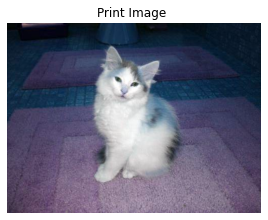

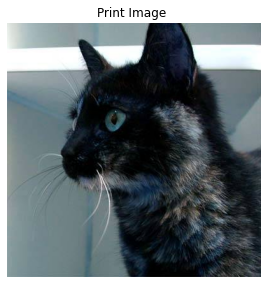

(None, None)

In [10]:
# Call function to print selected image
print_image(images_orignal_test[0], test_labels[0]), print_image(images_orignal_test[51], test_labels[51])

In [11]:
len(train_pca_singular_values)

1002

# Part B: Training phase:

## Train and Test Split

In [12]:
# Split the data into Train and Test using Labels also
X_train, X_test, y_train, y_test = train_test_split(train_pca_singular_values, train_labels_code, test_size=0.25, random_state=883)

### K Neighbors Classifier

In [13]:
# Set the KNN model to 2 clusters
km_model = KMeans(n_clusters=2, random_state=883)

In [14]:
# Train KNN Model using Train data and labels
km_model = km_model.fit(X_train, y_train)

In [15]:
# Take Mean Squared Error and remove the square root to get RMSE based on the Test data
knnResults = km_model.predict(X_test)
mse_knn = mean_squared_error(y_test, knnResults)
rmse_knn = np.round(sqrt(mse_knn), 4)
print(f'Root Mean Squared Error is {rmse_knn:0.2%}')

Root Mean Squared Error is 73.61%


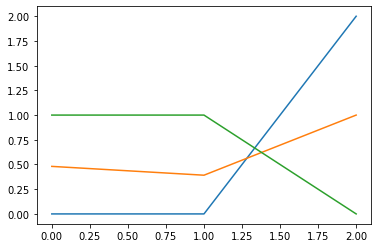

In [16]:
plot(roc_curve(y_test, knnResults))

### Decision Tree Classifier

In [17]:
# Initializing Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=883)

In [18]:
# Train the Model
dt = dt.fit(X_train, y_train)

In [19]:
# Take Mean Squared Error and remove the square root to get RMSE based on the Test data
dtResults = dt.predict(X_test)
mse_model_dt = mean_squared_error(y_test, dtResults)
rmse_model_dt = np.round(sqrt(mse_model_dt), 4)
print(f'Root Mean Squared Error is {rmse_model_dt:0.2%}')

Root Mean Squared Error is 65.60%


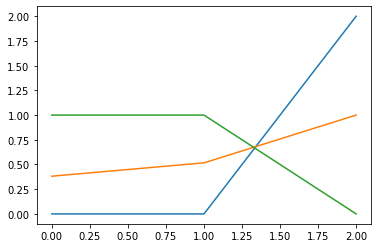

In [20]:
plot(roc_curve(y_test, dtResults))

### Random Forest Classifier

In [21]:
# Initializing Random Forest Classifier
rf = RandomForestClassifier(max_depth=3, random_state=883)

In [22]:
# Train the Model
rf = rf.fit(X_train, y_train)

In [23]:
# Take Mean Squared Error and remove the square root to get RMSE based on the Test data
rfResults = rf.predict(X_test)
mse_model_rf = mean_squared_error(y_test, rfResults)
rmse_model_rf = np.round(sqrt(mse_model_rf), 4)
print(f'Root Mean Squared Error is {rmse_model_rf:0.2%}')

Root Mean Squared Error is 63.12%


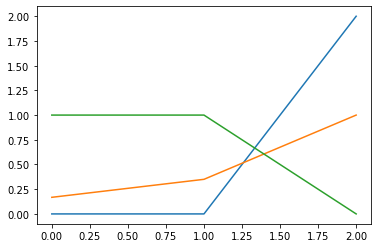

In [24]:
plot(roc_curve(y_test, rfResults))

# Part C: Optimization phase:

In [25]:
# Set the KNN model to 2 clusters
# algorithm{“auto”, “full”, “elkan”}, default=”auto”
km_model_full = KMeans(n_clusters=2, algorithm="full", random_state=883)

# Train KNN Model using Train data and labels
km_model_full = km_model_full.fit(X_train, y_train)

# Take Mean Squared Error and remove the square root to get RMSE based on the Test data
knnResults_full = km_model_full.predict(X_test)
mse_knn_full = mean_squared_error(y_test, knnResults_full)
rmse_knn_full = np.round(sqrt(mse_knn_full), 4)
print(f'Root Mean Squared Error is {rmse_knn_full:0.2%}')

Root Mean Squared Error is 73.61%


In [26]:
# Set the KNN model to 2 clusters
# algorithm{“auto”, “full”, “elkan”}, default=”auto”
km_model_elkan = KMeans(n_clusters=2, algorithm="elkan", random_state=883)

# Train KNN Model using Train data and labels
km_model_elkan = km_model_elkan.fit(X_train, y_train)

# Take Mean Squared Error and remove the square root to get RMSE based on the Test data
knnResults_elkan = km_model_elkan.predict(X_test)
mse_knn_elkan = mean_squared_error(y_test, knnResults_elkan)
rmse_knn_elkan = np.round(sqrt(mse_knn_elkan), 4)
print(f'Root Mean Squared Error is {rmse_knn_elkan:0.2%}')

Root Mean Squared Error is 73.61%


## Predict with KNN Full with the unseen data

In [27]:
# Take Mean Squared Error and remove the square root to get RMSE based on the Test data
knnResults_full_unseen = km_model_full.predict(test_pca_singular_values)

In [28]:
knnResults_full_unseen

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0], dtype=int32)

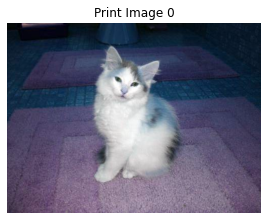

In [29]:
print_image(images_orignal_test[0], str(knnResults_full_unseen[0]))

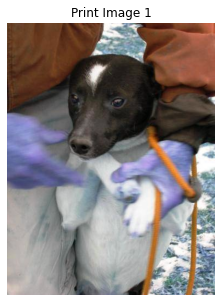

In [30]:
print_image(images_orignal_test[2], str(knnResults_full_unseen[2]))